In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)
import random
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.colors import n_colors
from plotly.subplots import make_subplots
init_notebook_mode(connected=True)
import cufflinks as cf
cf.go_offline()
from wordcloud import WordCloud
from PIL import Image

In [3]:
df = pd.read_csv('indian_food.csv')
df.head()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,sweet,dessert,West Bengal,East


In [4]:
df.isna().sum()

name              0
ingredients       0
diet              0
prep_time         0
cook_time         0
flavor_profile    0
course            0
state             0
region            1
dtype: int64

In [5]:
df.shape

(255, 9)

In [6]:
df=df.replace(-1,np.nan)
df=df.replace('-1',np.nan)
# df.dropna(axis=0,inplace=True)
df.shape

(255, 9)

he dataset consists of about 254 Indian dishes and 9 columns associated with each of them.

The 9 columns are as follows:-

name : name of the dish

ingredients : main ingredients used

diet : type of diet - either vegetarian or non vegetarian

prep_time : preparation time

cook_time : cooking time

flavor_profile : flavor profile includes whether the dish is spicy, sweet, bitter, etc

course : course of meal - starter, main course, dessert, etc

state : state where the dish is famous or is originated

region : region where the state belongs

All the observations in this notebook will be based on these 254 dishes. There are many more dishes in Indian Cuisine!

**Proportion of Vegetarian and Non-Vegetarian Dishes**

In [7]:
px.pie(data_frame=df,names='diet',title='Proportion of Vegetarian and Non-Vegetarian Dishes',color_discrete_sequence=['green','red'])

Therefore there are more vegetarian dishes as compared to non-veg dishes.

**Most dishes in which Region?**

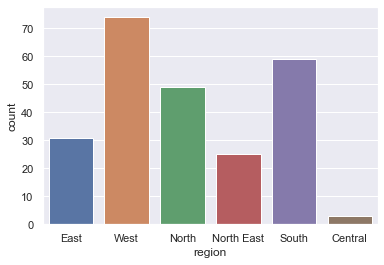

In [8]:
sns.countplot(data=df,x='region');

from west and east side of india have more dishes.

**Proportion of flavours**

In [12]:
px.pie(data_frame=df,names='flavor_profile',title='Proportion of Flavour Profile')

In [20]:
course_df = df.course.value_counts().reset_index()
course_df.columns = ['course','count']
px.bar(course_df,x='course',y='count',title='Courses of Meal')

In [23]:
px.pie(data_frame=df,names='course')

**Ingredients used in Indian Desserts**

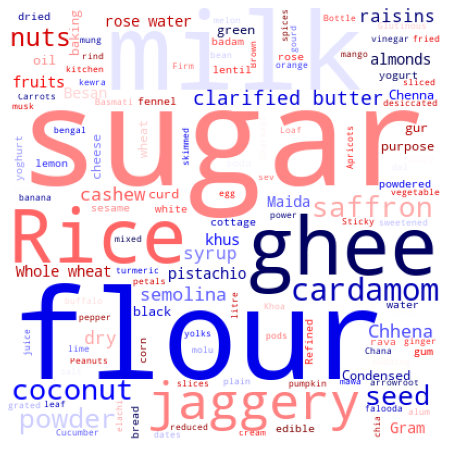

In [36]:
desert_df = df[df['course']== 'dessert'].reset_index()
ingredients = []
for i in range(0,len(desert_df)):
    text = desert_df['ingredients'][i].split(',')
    text = ",".join(text)
    ingredients.append(text)
    text = ' '.join(ingredients)

wordcloud = WordCloud(width=400, height=400,colormap='seismic',
background_color='white').generate(text)
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis('off');


**Ingredients used in North-Indian Cuisine**

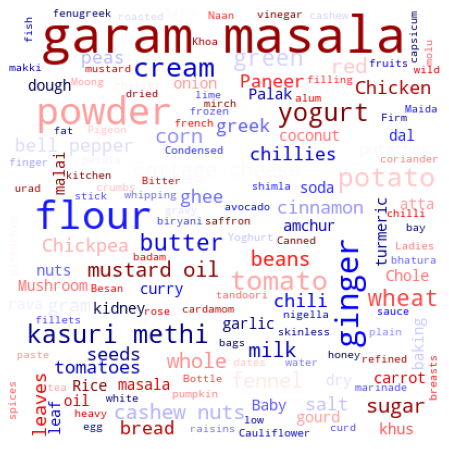

In [38]:
north_df = df[df['region']=='North'].reset_index()
ingredients = []
for i in range(0,len(north_df)):
    text = north_df['ingredients'][i].split(',')
    text = ",".join(text)
    ingredients.append(text)
    text = ' '.join(ingredients)

wordcloud = WordCloud(width=400, height=400,colormap='seismic',
background_color='white').generate(text)
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis('off');

**Ingredients used in South-Indian Cuisine**

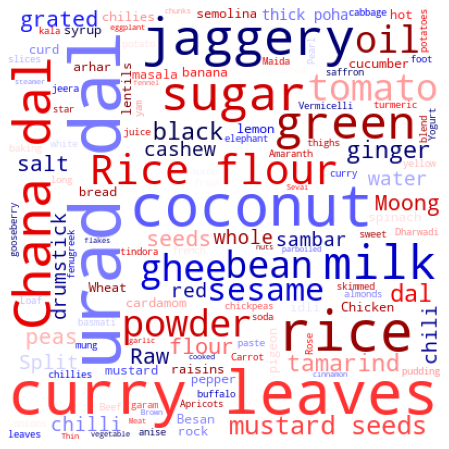

In [39]:
south_df = df[df['region']=='South'].reset_index()
ingredients = []
for i in range(0,len(south_df)):
    text = south_df['ingredients'][i].split(',')
    text = ",".join(text)
    ingredients.append(text)
    text = ' '.join(ingredients)

wordcloud = WordCloud(width=400, height=400,colormap='seismic',
background_color='white').generate(text)
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis('off');

**Ingredients Used in West-India Cuisine**

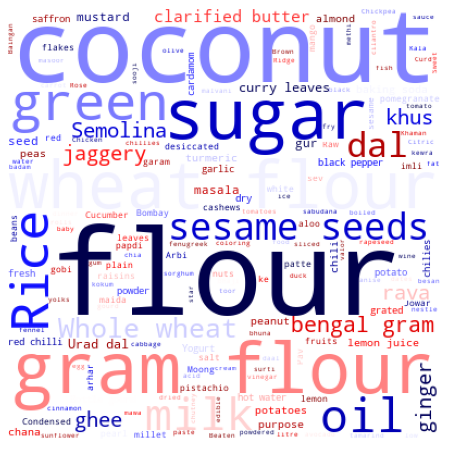

In [40]:
west_df = df[df['region']=='West'].reset_index()
ingredients = []
for i in range(0,len(west_df)):
    text = west_df['ingredients'][i].split(',')
    text = ",".join(text)
    ingredients.append(text)
    text = ' '.join(ingredients)

wordcloud = WordCloud(width=400, height=400,colormap='seismic',
background_color='white').generate(text)
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis('off');

**Ingredients Used in Indian Cuisine**

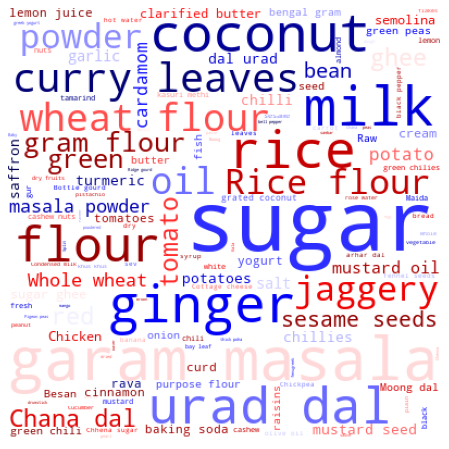

In [41]:
ingredients = []
for i in range(0,len(df)):
    text = df['ingredients'][i].split(',')
    text = ",".join(text)
    ingredients.append(text)
    text = ' '.join(ingredients)

wordcloud = WordCloud(width=400, height=400,colormap='seismic',
background_color='white').generate(text)
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis('off');

In [47]:
px.scatter(df,x='cook_time',y='prep_time',color='diet')

**Ingredients used in Vegetarian Food**

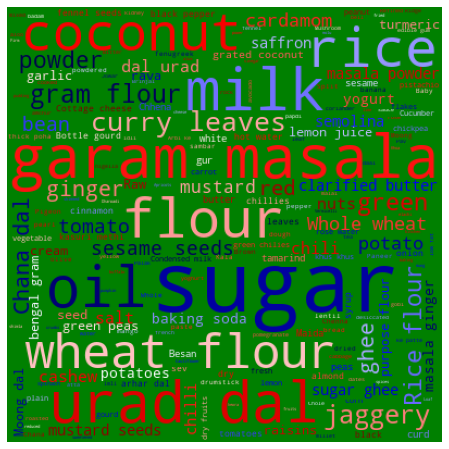

In [51]:
veg = df[df['diet']=='vegetarian'].reset_index()
ingredients = []
for i in range(0,len(veg)):
    text = veg['ingredients'][i].split(',')
    text = ",".join(text)
    ingredients.append(text)
    text = ' '.join(ingredients)

wordcloud = WordCloud(width=400, height=400,colormap='seismic',
background_color='green').generate(text)
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis('off');

**Ingredients used in Non Vegetarian Food**

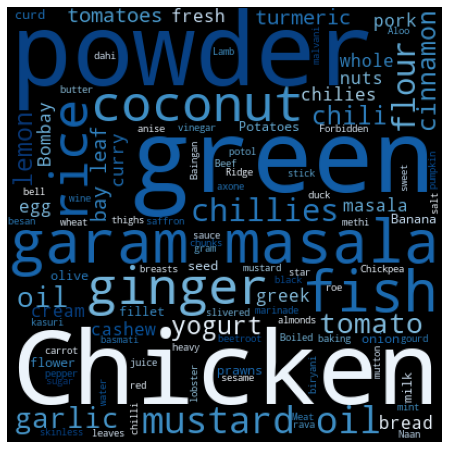

In [56]:
non_veg = df[df['diet']=='non vegetarian'].reset_index()
ingredients = []
for i in range(0,len(non_veg)):
    text = non_veg['ingredients'][i].split(',')
    text = ",".join(text)
    ingredients.append(text)
    text = ' '.join(ingredients)

wordcloud = WordCloud(width=400, height=400,colormap='Blues',
background_color='black').generate(text)
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis('off');

**Snacks Cooking Time**

In [60]:
snack_df = df[df['course']=='snack']

short_sort_snack_df = snack_df.sort_values(['cook_time'],ascending=True)
fig = px.bar(short_sort_snack_df,y='name',x='cook_time',
             orientation='h',color='cook_time',
            labels={'name':'Name of snack','cook_time':'Cooking time (minutes)'})
fig.show()

**Main Course Cooking Time**

In [61]:
mc_df = df[df['course']=='main course']

small_mc_df = mc_df.sort_values(['cook_time'],ascending=True)
fig = px.bar(small_mc_df,y='name',x='cook_time',
             orientation='h',color='cook_time',
            labels={'name':'Name of main course','cook_time':'Cooking time (minutes)'})
fig.show()

In [63]:
mc_df = df[df['course']=='dessert']

small_mc_df = mc_df.sort_values(['cook_time'],ascending=True)
fig = px.bar(small_mc_df,y='name',x='cook_time',
             orientation='h',color='cook_time',
            labels={'name':'Name of Desserts','cook_time':'Cooking time (minutes)'})
fig.show()